<a href="https://colab.research.google.com/github/trapti-singh/portfolio1/blob/main/ANN_with_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


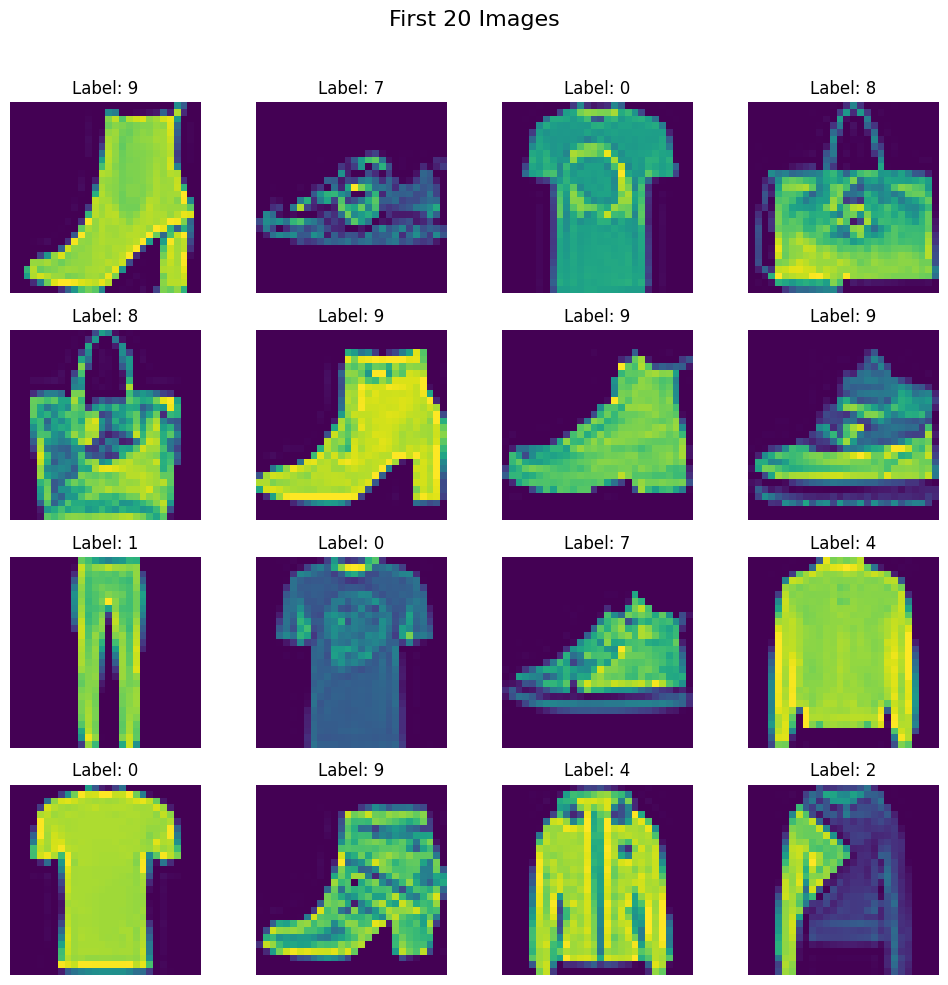

In [4]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 20 Images", fontsize=16)

# Plot the first 20 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [5]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [9]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]

In [10]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [13]:
train_dataset[6]

(tensor([0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2745, 0.3255, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.2824, 0.2588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0039, 0.0000, 0.0000, 0.4118,
         0.8353, 0.7765, 0.7451, 0.9373, 0.8941, 0.7020, 0.5882, 0.5608, 0.6196,
         0.6902, 0.9333, 0.7725, 0.7686, 0.8431, 0.4824, 0.0000, 0.0000, 0.0039,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4039,
         0.8824, 0.7451, 0.7255, 0.7137, 0.7176, 0.7725, 0.8314, 0.8353, 0.8392,
         0.8392, 0.8118, 0.7451, 0.7020, 0.7059, 0.7373, 0.7922, 0.3255, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.1255,
         0.7882, 0.7098, 0.7294, 0.7333, 0.7098, 0.7294, 0.7137, 0.6549, 0.6667,
         0.6471, 0.6549, 0.6667, 0.7137, 0.7216, 0.7412, 0.7255, 0.7451, 0.9098,
         0.0078, 0.0000, 0.0

In [14]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [15]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [30]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 240),
        nn.ReLU(),
        nn.Linear(240, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )

  def forward(self, x):

    return self.model(x)

In [39]:
# set learning rate and epochs
epochs = 300
learning_rate = 0.1

In [40]:
# instatiate the model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [41]:
len(train_loader)

150

In [42]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 1.3245965957641601
Epoch: 2 , Loss: 0.7656876492500305
Epoch: 3 , Loss: 0.6490813142061234
Epoch: 4 , Loss: 0.5747955950101217
Epoch: 5 , Loss: 0.5305225842197736
Epoch: 6 , Loss: 0.4969983972112338
Epoch: 7 , Loss: 0.4634695277611415
Epoch: 8 , Loss: 0.43611397564411164
Epoch: 9 , Loss: 0.40099460204442344
Epoch: 10 , Loss: 0.3941893005867799
Epoch: 11 , Loss: 0.3717657404144605
Epoch: 12 , Loss: 0.3497042068342368
Epoch: 13 , Loss: 0.3381721039613088
Epoch: 14 , Loss: 0.33344913298885026
Epoch: 15 , Loss: 0.30644644434253376
Epoch: 16 , Loss: 0.2946312313030163
Epoch: 17 , Loss: 0.2906858732302984
Epoch: 18 , Loss: 0.27121198738614716
Epoch: 19 , Loss: 0.26557497173547745
Epoch: 20 , Loss: 0.25151792719960214
Epoch: 21 , Loss: 0.2556505804260572
Epoch: 22 , Loss: 0.23844231034318605
Epoch: 23 , Loss: 0.2302721881121397
Epoch: 24 , Loss: 0.2173499203224977
Epoch: 25 , Loss: 0.21063676377137502
Epoch: 26 , Loss: 0.19748379285136858
Epoch: 27 , Loss: 0.1933436396966378


In [43]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=240, bias=True)
    (1): ReLU()
    (2): Linear(in_features=240, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [44]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.8441666666666666


In [45]:
len(test_loader)

38